In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("overdoses.csv")
df.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [4]:
#Highest and lowest death rate States
if df['Population'].dtype != 'int64':
    df['Population'] = pd.to_numeric(df['Population'].str.replace(',', ''), errors='coerce')

if df['Deaths'].dtype != 'int64':
    df['Deaths'] = pd.to_numeric(df['Deaths'].str.replace(',', ''), errors='coerce')

df['Death_Per_Population'] = df['Deaths'] / df['Population']

max_death_per_population_state = df.loc[df['Death_Per_Population'].idxmax(), 'State']
min_death_per_population_state = df.loc[df['Death_Per_Population'].idxmin(), 'State']
print(max_death_per_population_state)
print(min_death_per_population_state)

West Virginia
North Dakota


In [5]:
df2 = pd.read_csv("Medicaid1.csv")
df3 = pd.read_csv("Medicare1.csv")

In [6]:
df2.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2021,National,NaN,National,All,21654225.0,686625295.0,3.15,-2.23,-0.09,4672903.0,21.58,14.04,2.64
1,2021,National,NaN,National,FFS,5084859.0,180712324.0,2.81,-2.48,-0.15,736567.0,14.49,5.34,1.05
2,2021,National,NaN,National,MC,16569366.0,505912971.0,3.28,-2.14,-0.06,3936336.0,23.76,16.90,2.98
3,2021,State,1.0,Alabama,All,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18
4,2021,State,1.0,Alabama,FFS,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18


In [7]:
df3.head()

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2021,National,NaN,National,NaN,Totals,Overall,1286336.0,784670.0,61178886.0,1.498083e+09,4.08,-1.24,-0.14,6059331.0,9.90,-2.98,-0.63
1,2021,National,NaN,National,NaN,Rural/Urban,Rural,138060.0,93478.0,10635915.0,2.542085e+08,4.18,-1.31,-0.14,980797.0,9.22,-3.00,-0.52
2,2021,National,NaN,National,NaN,Rural/Urban,Urban,1147131.0,690502.0,50501915.0,1.242983e+09,4.06,-1.23,-0.14,5736336.5,11.36,-2.61,-0.63
3,2021,State,1.0,Alabama,NaN,Totals,Overall,16377.0,9653.0,1700995.0,2.836658e+07,6.00,-1.47,-0.20,115986.0,6.82,-3.14,-0.40
4,2021,State,2.0,Alaska,NaN,Totals,Overall,2872.0,1847.0,83652.0,1.711086e+06,4.89,-2.05,0.14,13679.0,16.35,-2.94,-0.20


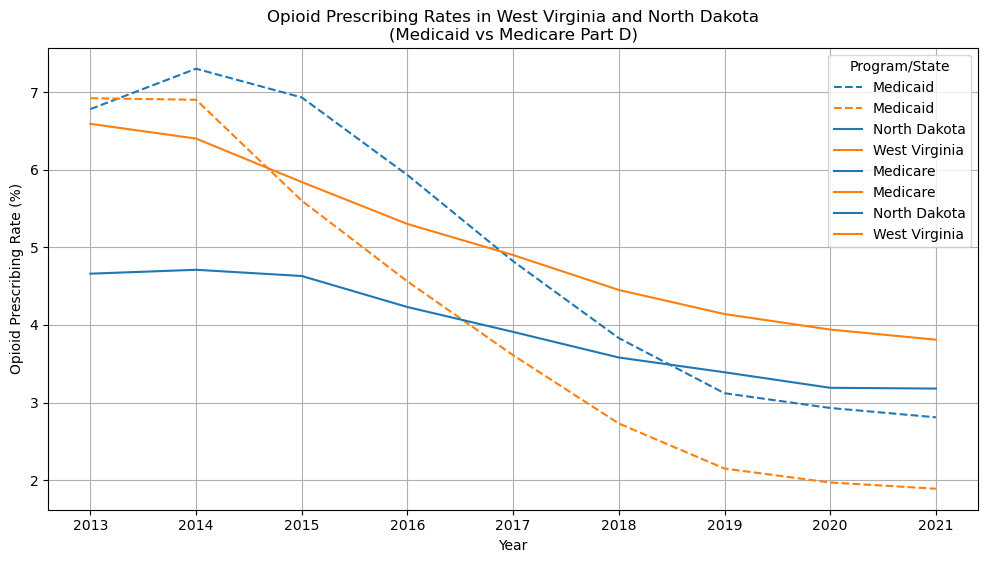

In [8]:
#### Filter data for West Virginia (WV) and North Dakota (ND) for both df2 (Medicaid) and df3 (Medicare Part D)
df2_wv_nd = df2[df2['Geo_Desc'].isin(['West Virginia', 'North Dakota'])]
df3_wv_nd = df3[df3['Prscrbr_Geo_Desc'].isin(['West Virginia', 'North Dakota'])]

# Focus on the overall opioid prescribing rate for both programs
# For df2 (Medicaid)
df2_wv_nd = df2_wv_nd[df2_wv_nd['Plan_Type'] == 'All'][['Year', 'Geo_Desc', 'Opioid_Prscrbng_Rate']]
df2_wv_nd.rename(columns={'Geo_Desc': 'State', 'Opioid_Prscrbng_Rate': 'Medicaid_Opioid_Rate'}, inplace=True)

# For df3 (Medicare Part D)
df3_wv_nd = df3_wv_nd[df3_wv_nd['Breakout'] == 'Overall'][['Year', 'Prscrbr_Geo_Desc', 'Opioid_Prscrbng_Rate']]
df3_wv_nd.rename(columns={'Prscrbr_Geo_Desc': 'State', 'Opioid_Prscrbng_Rate': 'Medicare_Opioid_Rate'}, inplace=True)

# Merge the two datasets on Year and State
merged_data = pd.merge(df2_wv_nd, df3_wv_nd, on=['Year', 'State'])

# Plotting
plt.figure(figsize=(12, 6))

# Medicaid
sns.lineplot(data=merged_data, x='Year', y='Medicaid_Opioid_Rate', hue='State', linestyle='dashed', label='Medicaid')

# Medicare
sns.lineplot(data=merged_data, x='Year', y='Medicare_Opioid_Rate', hue='State', label='Medicare')

plt.title('Opioid Prescribing Rates in West Virginia and North Dakota\n(Medicaid vs Medicare Part D)')
plt.ylabel('Opioid Prescribing Rate (%)')
plt.xlabel('Year')
plt.legend(title='Program/State')
plt.grid(True)

plt.show()

In [9]:
df4 = pd.read_csv("Opioid_prescription_amounts.csv")
df4.head()

,FIPS,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
0,2050,AK,BETHEL,NaN,NaN,NaN,NaN
1,2068,AK,DENALI,NaN,NaN,NaN,NaN
2,2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
3,2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
4,2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [10]:
df5 = pd.read_csv("overdosedeathsbycounty.csv")
df5.head()

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/951140167.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv("overdosedeathsbycounty.csv")


,Data as of,Year,Month,ST_ABBREV,STATE_NAME,COUNTYNAME,FIPS,STATEFIPS,COUNTYFIPS,CODE2013,Provisional Drug Overdose Deaths,Footnote,Percentage Of Records Pending Investigation,HistoricalDataCompletenessNote,MonthEndingDate,Start Date,End Date
0,10/08/2023,2020,1,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.56,NaN,01/31/2020,01/31/2020,03/31/2023
1,10/08/2023,2020,2,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.55,NaN,02/29/2020,01/31/2020,03/31/2023
2,10/08/2023,2020,3,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.55,NaN,03/31/2020,01/31/2020,03/31/2023
3,10/08/2023,2020,4,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.54,NaN,04/30/2020,01/31/2020,03/31/2023
4,10/08/2023,2020,5,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.54,NaN,05/31/2020,01/31/2020,03/31/2023


In [11]:
# Convert 'Provisional Drug Overdose Deaths' to numeric, handling non-numeric entries
df5['Provisional Drug Overdose Deaths'] = pd.to_numeric(df5['Provisional Drug Overdose Deaths'], errors='coerce')

# Dropping rows with NaN values in 'Provisional Drug Overdose Deaths' column
df5_cleaned = df5.dropna(subset=['Provisional Drug Overdose Deaths'])

# Grouping by Year, State, and County, and summing up the deaths
df5_grouped = df5_cleaned.groupby(['Year', 'STATE_NAME', 'COUNTYNAME'])['Provisional Drug Overdose Deaths'].sum().reset_index()

# Displaying the first few rows of the grouped data
df5_grouped.head()

,Year,STATE_NAME,COUNTYNAME,Provisional Drug Overdose Deaths
0,2020,Alabama,Baldwin,544.0
1,2020,Alabama,Blount,110.0
2,2020,Alabama,Calhoun,363.0
3,2020,Alabama,Choctaw,0.0
4,2020,Alabama,Cleburne,0.0


In [12]:
# Filter states for only "West Virginia" and "North Dakota"
selected_states = ['West Virginia', 'North Dakota']
df5_filtered = df5_grouped[df5_grouped['STATE_NAME'].isin(selected_states)]
df5_filtered

,Year,STATE_NAME,COUNTYNAME,Provisional Drug Overdose Deaths
1331,2020,North Dakota,Adams,0.0
1332,2020,North Dakota,Barnes,0.0
1333,2020,North Dakota,Billings,0.0
1334,2020,North Dakota,Bottineau,0.0
1335,2020,North Dakota,Bowman,0.0
...,...,...,...,...
8305,2023,West Virginia,Upshur,10.0
8306,2023,West Virginia,Wayne,106.0
8307,2023,West Virginia,Wetzel,10.0
8308,2023,West Virginia,Wood,124.0


In [13]:
counties_shapefile = gpd.read_file("cb_2020_us_county_20m.shp")

counties_shapefile.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,061,00161556,0500000US01061,01061,Geneva,Geneva County,AL,Alabama,06,1487908432,11567409,"POLYGON ((-86.19348 31.19221, -86.12541 31.182..."
1,08,125,00198178,0500000US08125,08125,Yuma,Yuma County,CO,Colorado,06,6123763559,11134665,"POLYGON ((-102.80377 40.00255, -102.79358 40.3..."
2,17,177,01785076,0500000US17177,17177,Stephenson,Stephenson County,IL,Illinois,06,1461392061,1350223,"POLYGON ((-89.92647 42.50579, -89.83759 42.504..."
3,28,153,00695797,0500000US28153,28153,Wayne,Wayne County,MS,Mississippi,06,2099745602,7255476,"POLYGON ((-88.94335 31.82456, -88.91046 31.826..."
4,34,041,00882237,0500000US34041,34041,Warren,Warren County,NJ,New Jersey,06,923435921,15822933,"POLYGON ((-75.19261 40.71587, -75.17748 40.764..."


In [14]:
# Merge your DataFrame with the shapefile based on STATE_NAME
merged_data = counties_shapefile.merge(df5_filtered, left_on=["NAME", "STATE_NAME"], right_on=["COUNTYNAME", "STATE_NAME"])

merged_data.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,Year,COUNTYNAME,Provisional Drug Overdose Deaths
0,54,063,01557702,0500000US54063,54063,Monroe,Monroe County,WV,West Virginia,06,1224426771,2297599,"POLYGON ((-80.85736 37.42113, -80.66432 37.708...",2021,Monroe,75.0
1,54,063,01557702,0500000US54063,54063,Monroe,Monroe County,WV,West Virginia,06,1224426771,2297599,"POLYGON ((-80.85736 37.42113, -80.66432 37.708...",2022,Monroe,33.0
2,54,063,01557702,0500000US54063,54063,Monroe,Monroe County,WV,West Virginia,06,1224426771,2297599,"POLYGON ((-80.85736 37.42113, -80.66432 37.708...",2023,Monroe,11.0
3,54,041,01550027,0500000US54041,54041,Lewis,Lewis County,WV,West Virginia,06,1002143596,7036534,"POLYGON ((-80.72833 39.09568, -80.70064 39.090...",2021,Lewis,115.0
4,54,041,01550027,0500000US54041,54041,Lewis,Lewis County,WV,West Virginia,06,1002143596,7036534,"POLYGON ((-80.72833 39.09568, -80.70064 39.090...",2022,Lewis,22.0


/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/126359328.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


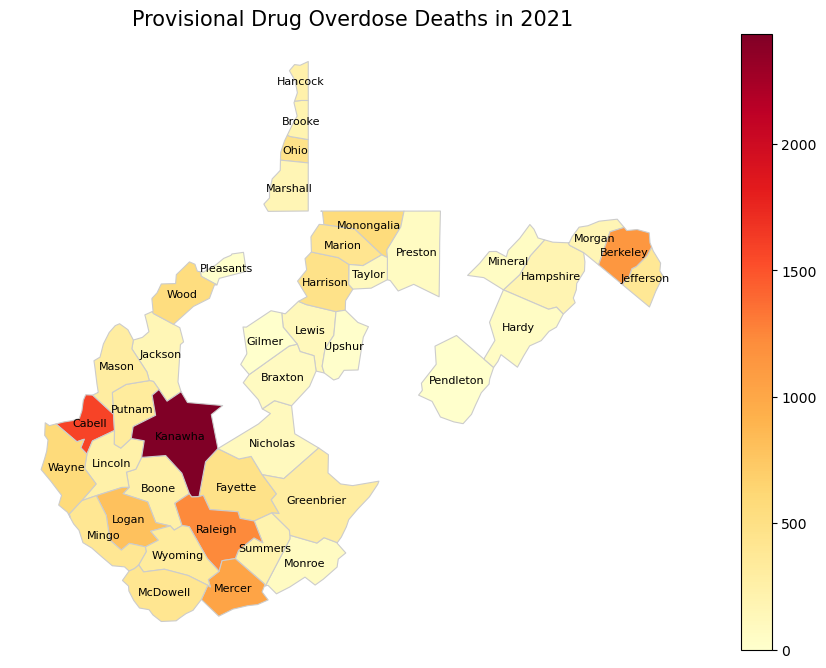

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/126359328.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


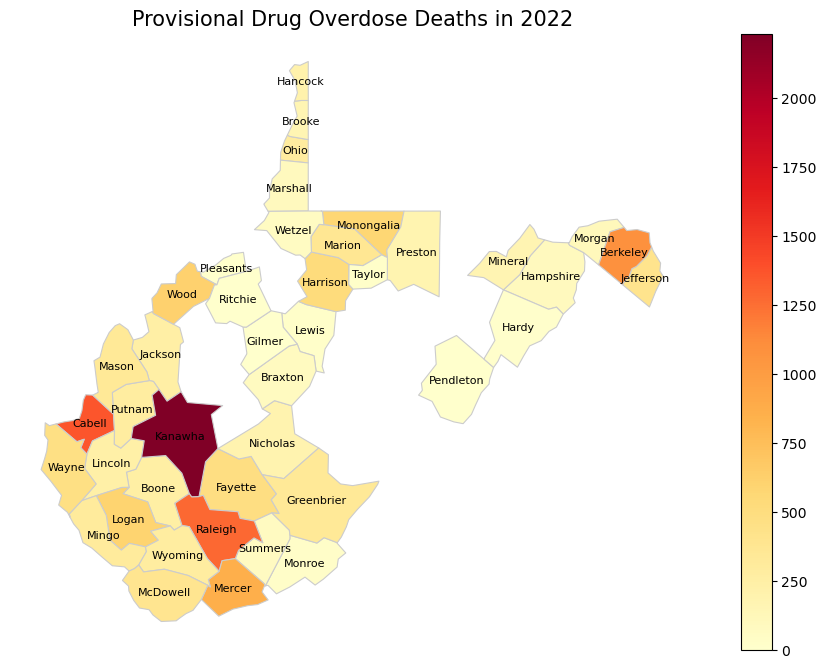

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/126359328.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


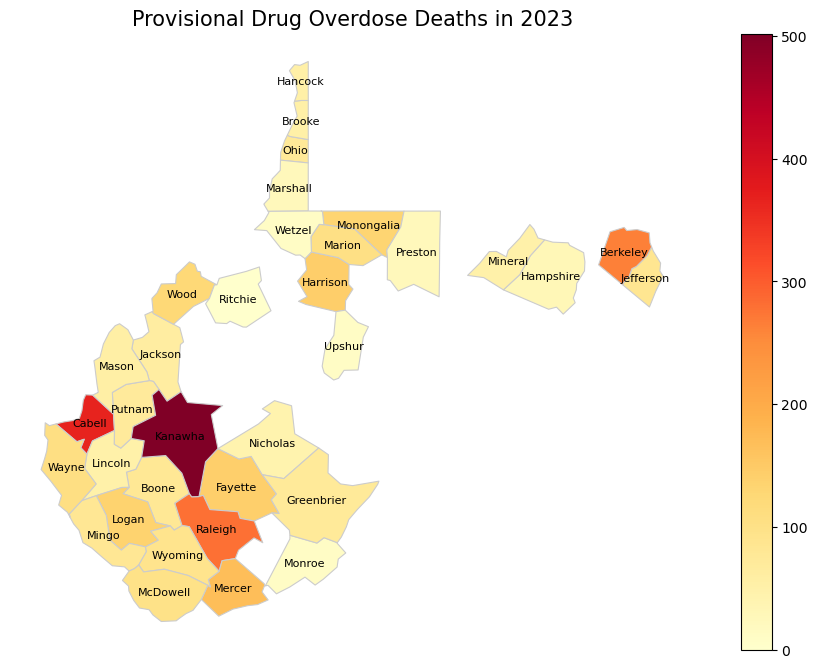

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/126359328.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


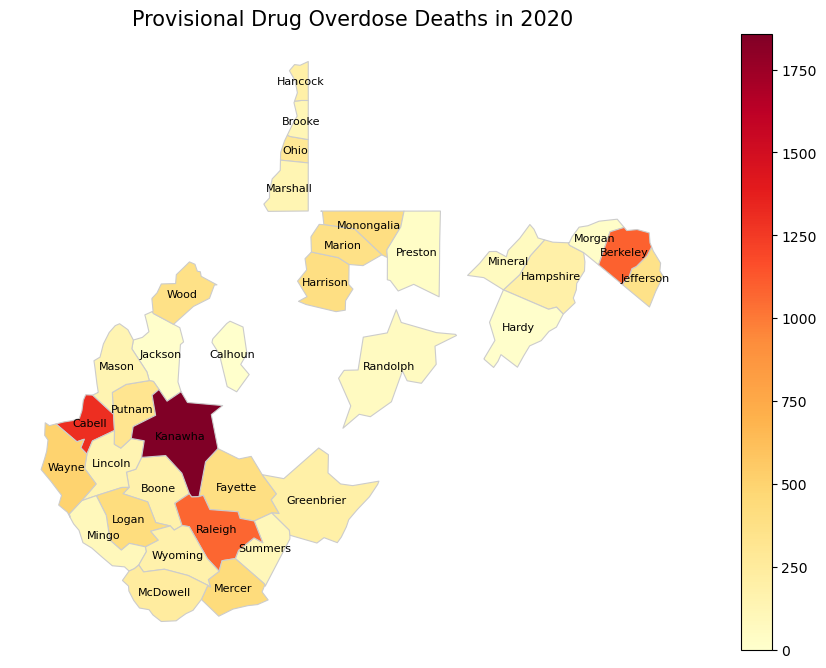

In [15]:

# Filter data for West Virginia and North Dakota
wv_nd_data = merged_data[(merged_data['STATE_NAME'] == 'West Virginia')]

# Plot individual maps for each year
years = wv_nd_data['Year'].unique()

for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Filter data for the current year
    year_data = wv_nd_data[wv_nd_data['Year'] == year]
    
    # Plot the map
    year_data.plot(column='Provisional Drug Overdose Deaths', ax=ax, legend=True, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8')
    
    # Annotate with county names
    for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
    # Set the title
    ax.set_title(f"Provisional Drug Overdose Deaths in {year}", fontdict={'fontsize': '15', 'fontweight' : '3'})
    
    # Set axis labels
    ax.set_axis_off()

    # Show the map
    plt.show()

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/3641368260.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


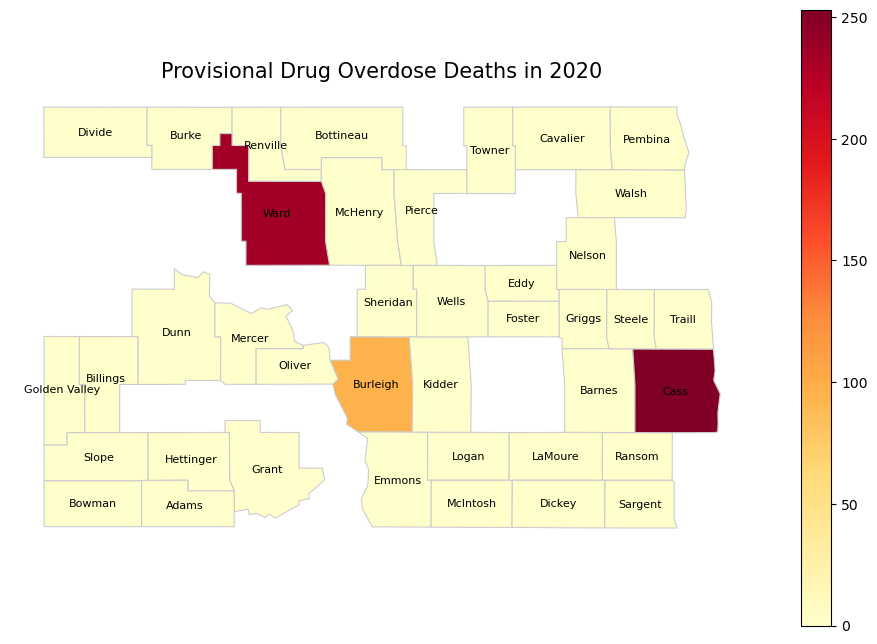

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/3641368260.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


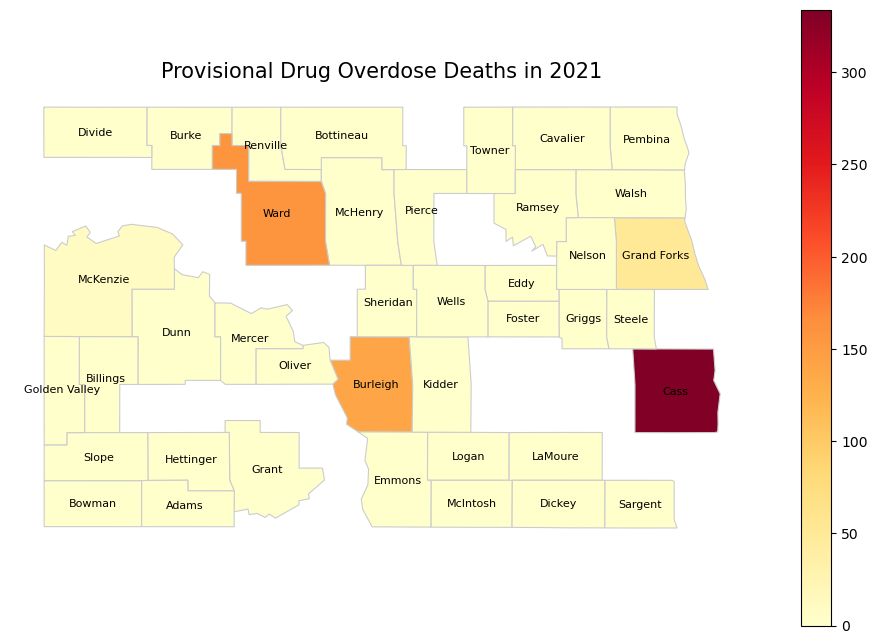

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/3641368260.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


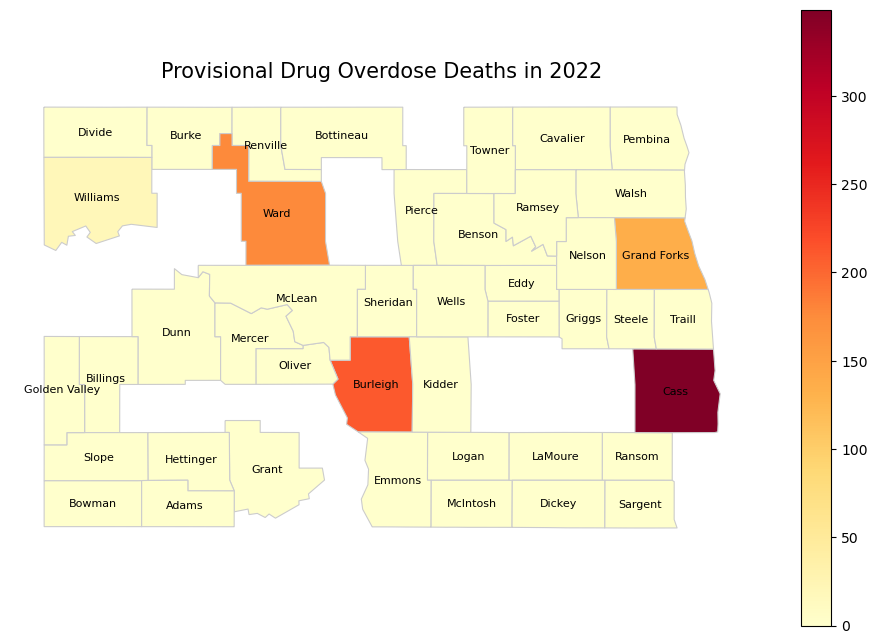

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/3641368260.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):


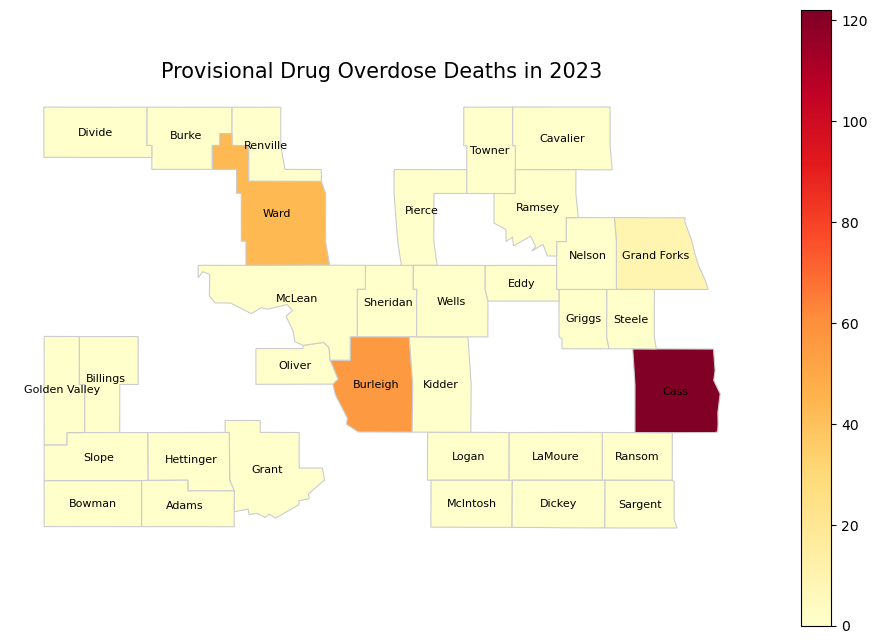

In [16]:

# Filter data for West Virginia and North Dakota
wv_nd_data = merged_data[(merged_data['STATE_NAME'] == 'North Dakota')]

# Plot individual maps for each year
years = wv_nd_data['Year'].unique()

for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Filter data for the current year
    year_data = wv_nd_data[wv_nd_data['Year'] == year]
    
    # Plot the map
    year_data.plot(column='Provisional Drug Overdose Deaths', ax=ax, legend=True, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8')
    
    # Annotate with county names
    for x, y, label in zip(year_data.geometry.centroid.x, year_data.geometry.centroid.y, year_data['COUNTYNAME']):
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
    # Set the title
    ax.set_title(f"Provisional Drug Overdose Deaths in {year}", fontdict={'fontsize': '15', 'fontweight' : '3'})
    
    # Set axis labels
    ax.set_axis_off()

    # Show the map
    plt.show()

In [17]:
df_sum = df5_filtered.groupby('STATE_NAME')['Provisional Drug Overdose Deaths'].sum().reset_index()
print(df_sum)

      STATE_NAME  Provisional Drug Overdose Deaths
0   North Dakota                            2398.0
1  West Virginia                           47416.0


In [18]:
education1 = pd.read_excel('Education2.xlsx')
education1 = education1.drop(columns=['Federal Information Processing Standard (FIPS) Code'])
education1

,State,Area name,Attribute,Value
0,US,United States,"Less than a high school diploma, 1970",5.237331e+07
1,US,United States,"High school diploma only, 1970",3.415805e+07
2,US,United States,"Some college (1-3 years), 1970",1.165073e+07
3,US,United States,"Four years of college or higher, 1970",1.171727e+07
4,US,United States,Percent of adults with less than a high school...,4.770000e+01
...,...,...,...,...
169230,PR,Yauco Municipio,"Bachelor's degree or higher, 2017-21",6.651000e+03
169231,PR,Yauco Municipio,Percent of adults with less than a high school...,2.215034e+01
169232,PR,Yauco Municipio,Percent of adults with a high school diploma o...,3.465960e+01
169233,PR,Yauco Municipio,Percent of adults completing some college or a...,1.727135e+01


In [19]:
population = pd.read_excel("PopulationEstimates.xlsx")
population.head()

,FIPStxt,State,Area_Name,Attribute,Value
0,0,US,United States,CENSUS_2020_POP,331449281.0
1,0,US,United States,ESTIMATES_BASE_2020,331449520.0
2,0,US,United States,POP_ESTIMATE_2020,331511512.0
3,0,US,United States,POP_ESTIMATE_2021,332031554.0
4,0,US,United States,POP_ESTIMATE_2022,333287557.0


In [20]:
poverty = pd.read_excel("PovertyEstimates.xlsx")
poverty

,FIPS_Code,Stabr,Area_name,Attribute,Value
0,0,US,United States,POVALL_2021,41393176.0
1,0,US,United States,CI90LBALL_2021,41149497.0
2,0,US,United States,CI90UBALL_2021,41636855.0
3,0,US,United States,PCTPOVALL_2021,12.8
4,0,US,United States,CI90LBALLP_2021,12.7
...,...,...,...,...,...
79935,56045,WY,Weston County,CI90LB517P_2021,6.8
79936,56045,WY,Weston County,CI90UB517P_2021,14.6
79937,56045,WY,Weston County,MEDHHINC_2021,62509.0
79938,56045,WY,Weston County,CI90LBINC_2021,55613.0


In [21]:
unemployment = pd.read_excel("Unemployment.xlsx")
unemployment.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


In [22]:
# Pivoting the table
pivoted_data = education1.pivot_table(index=['State', 'Area name'],
                                      columns='Attribute', values='Value', aggfunc='first')

# Resetting index to turn multi-index into columns
pivoted_data_reset = pivoted_data.reset_index()

# Filtering the dataset to keep only the columns that have '2017-21' in their names
columns_2017_2021 = [col for col in pivoted_data_reset.columns if '2017-21' in col]

# Keeping the identifying columns along with the filtered columns
filtered_data = pivoted_data_reset[['State', 'Area name'] + columns_2017_2021]

states_to_keep = ['WV', 'ND']
filtered_states_data = filtered_data[filtered_data['State'].isin(states_to_keep)]

filtered_states_data

Attribute,State,Area name,"Bachelor's degree or higher, 2017-21","High school diploma only, 2017-21","Less than a high school diploma, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Some college or associate's degree, 2017-21"
1791,ND,Adams County,302.0,591.0,115.0,36.162128,19.126029,37.428752,7.283091,571.0
1792,ND,Barnes County,2216.0,2344.0,392.0,34.635692,29.250264,30.939810,5.174234,2624.0
1793,ND,Benson County,662.0,1000.0,455.0,37.808461,19.447709,29.377203,13.366627,1287.0
1794,ND,Billings County,160.0,227.0,35.0,29.666667,26.666667,37.833333,5.833333,178.0
1795,ND,Bottineau County,1090.0,1271.0,299.0,40.049583,24.566148,28.645481,6.738787,1777.0
...,...,...,...,...,...,...,...,...,...,...
3255,WV,West Virginia,278281.0,512232.0,152581.0,26.200511,21.776192,40.083448,11.939849,334820.0
3256,WV,Wetzel County,1529.0,5081.0,1165.0,26.177364,14.517660,48.243449,11.061527,2757.0
3257,WV,Wirt County,545.0,1548.0,703.0,27.826536,14.068147,39.958699,18.146618,1078.0
3258,WV,Wood County,13170.0,21147.0,5639.0,33.955933,21.768955,34.954297,9.320815,20543.0


In [23]:
# Creating the pivot table
pivoted_population_data = population.pivot_table(index=['FIPStxt', 'State', 'Area_Name'], columns='Attribute', values='Value', aggfunc='first')

# Resetting index to turn multi-index into columns
pivoted_population_data_reset = pivoted_population_data.reset_index()

# Dropping the FIPStxt column and filtering the dataset for only the states West Virginia (WV) and North Dakota (ND)
pivoted_population_data_filtered = pivoted_population_data_reset.drop('FIPStxt', axis=1)
states_to_filter = ['WV', 'ND']
pivoted_population_data_filtered_states = pivoted_population_data_filtered[pivoted_population_data_filtered['State'].isin(states_to_filter)]

pivoted_population_data_filtered_states

Attribute,State,Area_Name,BIRTHS_2020,BIRTHS_2021,BIRTHS_2022,CENSUS_2020_POP,DEATHS_2020,DEATHS_2021,DEATHS_2022,DOMESTIC_MIG_2020,...,R_INTERNATIONAL_MIG_2021,R_INTERNATIONAL_MIG_2022,R_NATURAL_CHG_2021,R_NATURAL_CHG_2022,R_NET_MIG_2021,R_NET_MIG_2022,Rural_Urban_Continuum_Code_2003,Rural_Urban_Continuum_Code_2013,Urban_Influence_2003,Urban_Influence_2013
2035,ND,North Dakota,2563.0,10058.0,10164.0,779094.0,1758.0,7816.0,7365.0,-482.0,...,0.6,1.6,2.9,3.6,-4.5,-1.9,NaN,NaN,NaN,NaN
2036,ND,Adams County,7.0,23.0,24.0,2200.0,11.0,36.0,34.0,-8.0,...,0.0,0.0,-6.0,-4.7,-9.7,-12.7,9.0,9.0,12.0,12.0
2037,ND,Barnes County,23.0,95.0,95.0,10853.0,35.0,165.0,162.0,9.0,...,0.6,1.7,-6.5,-6.2,2.9,1.5,6.0,6.0,6.0,6.0
2038,ND,Benson County,28.0,118.0,116.0,5964.0,20.0,107.0,110.0,-27.0,...,0.0,0.2,1.9,1.0,-27.2,-1.7,9.0,9.0,12.0,12.0
2039,ND,Billings County,0.0,9.0,10.0,945.0,0.0,5.0,8.0,-10.0,...,0.0,0.0,4.2,2.0,25.3,53.6,9.0,9.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,WV,Webster County,19.0,70.0,70.0,8378.0,25.0,121.0,135.0,-17.0,...,0.0,0.0,-6.1,-7.9,-3.0,-6.4,9.0,9.0,12.0,12.0
3103,WV,Wetzel County,35.0,137.0,138.0,14442.0,53.0,251.0,268.0,-30.0,...,0.0,0.1,-8.0,-9.2,-6.1,-2.5,6.0,6.0,6.0,6.0
3104,WV,Wirt County,17.0,56.0,56.0,5194.0,12.0,74.0,81.0,-14.0,...,0.0,0.0,-3.5,-4.9,-20.5,11.8,3.0,3.0,2.0,2.0
3105,WV,Wood County,190.0,788.0,799.0,84296.0,256.0,1273.0,1377.0,-96.0,...,0.2,0.4,-5.8,-6.9,0.8,2.1,3.0,3.0,2.0,2.0


In [24]:
#Creating the pivot table
pivoted_poverty_data = poverty.pivot_table(index=['FIPS_Code', 'Stabr', 'Area_name'], columns='Attribute', values='Value', aggfunc='first')

# Resetting index to turn multi-index into columns
pivoted_poverty_data_reset = pivoted_poverty_data.reset_index()

pivoted_poverty_data_reset.head()
# Dropping the FIPS_Code column and filtering the dataset for columns that include '2021' and for the states West Virginia (WV) and North Dakota (ND)
poverty_data_filtered_columns = pivoted_poverty_data_reset.drop('FIPS_Code', axis=1)
columns_2021 = [col for col in poverty_data_filtered_columns.columns if '2021' in col]

# Keeping only the columns that have '2021' in their name
poverty_data_2021 = poverty_data_filtered_columns[['Stabr', 'Area_name'] + columns_2021]

# Filtering for only the states West Virginia (WV) and North Dakota (ND)
states_to_filter = ['WV', 'ND']
poverty_data_2021_filtered_states = poverty_data_2021[poverty_data_2021['Stabr'].isin(states_to_filter)]

poverty_data_2021_filtered_states

Attribute,Stabr,Area_name,CI90LB017P_2021,CI90LB017_2021,CI90LB04P_2021,CI90LB04_2021,CI90LB517P_2021,CI90LB517_2021,CI90LBALLP_2021,CI90LBALL_2021,...,CI90UBINC_2021,MEDHHINC_2021,PCTPOV017_2021,PCTPOV04_2021,PCTPOV517_2021,PCTPOVALL_2021,POV017_2021,POV04_2021,POV517_2021,POVALL_2021
2026,ND,North Dakota,10.6,19433.0,11.0,5510.0,9.6,12593.0,10.3,78002.0,...,69352.0,67603.0,11.5,12.9,10.5,10.9,21011.0,6455.0,13843.0,82270.0
2027,ND,Adams County,10.0,43.0,NaN,NaN,8.8,28.0,9.2,196.0,...,63309.0,56364.0,14.6,NaN,13.6,12.0,62.0,NaN,43.0,255.0
2028,ND,Barnes County,7.7,164.0,NaN,NaN,7.2,114.0,8.7,892.0,...,66613.0,61111.0,11.6,NaN,11.1,11.2,245.0,NaN,176.0,1149.0
2029,ND,Benson County,25.8,532.0,NaN,NaN,22.9,336.0,20.6,1190.0,...,52532.0,47080.0,37.0,NaN,34.8,26.3,763.0,NaN,511.0,1520.0
2030,ND,Billings County,9.0,18.0,NaN,NaN,8.1,11.0,8.3,79.0,...,87008.0,77375.0,13.3,NaN,12.7,10.8,26.0,NaN,18.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,WV,Webster County,25.1,393.0,NaN,NaN,22.7,272.0,19.1,1564.0,...,40427.0,36919.0,36.3,NaN,34.1,25.2,568.0,NaN,409.0,2060.0
3094,WV,Wetzel County,16.9,488.0,NaN,NaN,16.5,350.0,12.3,1724.0,...,55534.0,50110.0,24.7,NaN,24.7,16.4,712.0,NaN,525.0,2304.0
3095,WV,Wirt County,19.4,206.0,NaN,NaN,17.6,142.0,13.3,670.0,...,56247.0,50160.0,28.1,NaN,26.5,17.7,297.0,NaN,213.0,893.0
3096,WV,Wood County,14.6,2504.0,NaN,NaN,13.2,1700.0,12.0,9952.0,...,57878.0,53435.0,20.1,NaN,19.0,14.7,3447.0,NaN,2440.0,12172.0


In [31]:
# Reformatting the dataset to make the 'Attribute' column the column headings and the 'Value' column the corresponding values
# This will involve pivoting the table. We'll use 'FIPS_Code', 'State', and 'Area_Name' as the index.

# Creating the pivot table
pivoted_unemployment_data = unemployment.pivot_table(index=['FIPS_Code', 'State', 'Area_Name'], columns='Attribute', values='Value', aggfunc='first')

# Resetting index to turn multi-index into columns
pivoted_unemployment_data_reset = pivoted_unemployment_data.reset_index()

# Dropping the FIPS_Code column and filtering the dataset for columns that include '2020', '2021', or '2022'
# and for the states West Virginia (WV) and North Dakota (ND)
unemployment_data_filtered_columns = pivoted_unemployment_data_reset.drop('FIPS_Code', axis=1)
columns_2020_2022 = [col for col in unemployment_data_filtered_columns.columns if any(year in col for year in ['2020', '2021', '2022'])]

# Keeping only the columns that have '2020', '2021', or '2022' in their name
unemployment_data_2020_2022 = unemployment_data_filtered_columns[['State', 'Area_Name'] + columns_2020_2022]

# Filtering for only the states West Virginia (WV) and North Dakota (ND)
states_to_filter = ['WV', 'ND']
unemployment_data_2020_2022_filtered_states = unemployment_data_2020_2022[unemployment_data_2020_2022['State'].isin(states_to_filter)]

unemployment_data_2020_2022_filtered_states['Area_Name'] = unemployment_data_2020_2022_filtered_states['Area_Name'].str.replace(r", ND", "")
unemployment_data_2020_2022_filtered_states['Area_Name'] = unemployment_data_2020_2022_filtered_states['Area_Name'].str.replace(r", WV", "")

unemployment_data_2020_2022_filtered_states.head()

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/2672452486.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_2020_2022_filtered_states['Area_Name'] = unemployment_data_2020_2022_filtered_states['Area_Name'].str.replace(r", ND", "")
/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/2672452486.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_2020_2022_filtered_states['Area_Name'] = unemployment_data_2020_2022_filtered_states['Area_Name

Attribute,State,Area_Name,Civilian_labor_force_2020,Civilian_labor_force_2021,Civilian_labor_force_2022,Employed_2020,Employed_2021,Employed_2022,Med_HH_Income_Percent_of_State_Total_2021,Median_Household_Income_2021,Unemployed_2020,Unemployed_2021,Unemployed_2022,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022
2029,ND,North Dakota,409799.0,408900.0,414311.0,389415.0,396364.0,405580.0,100.0,67603.0,20384.0,12536.0,8731.0,5.0,3.1,2.1
2030,ND,Adams County,1006.0,976.0,955.0,970.0,948.0,934.0,83.4,56364.0,36.0,28.0,21.0,3.6,2.9,2.2
2031,ND,Barnes County,5192.0,5210.0,5226.0,4997.0,5072.0,5110.0,90.4,61111.0,195.0,138.0,116.0,3.8,2.6,2.2
2032,ND,Benson County,2310.0,2308.0,2347.0,2157.0,2212.0,2279.0,69.6,47080.0,153.0,96.0,68.0,6.6,4.2,2.9
2033,ND,Billings County,437.0,456.0,457.0,421.0,445.0,448.0,114.5,77375.0,16.0,11.0,9.0,3.7,2.4,2.0


In [32]:
# Ensuring consistent column names for 'State' and 'Area_name' across all datasets 
filtered_states_data.rename(columns={'Area name': 'Area_name'}, inplace=True)
pivoted_population_data_filtered_states.rename(columns={'Area_Name': 'Area_name'}, inplace=True)
unemployment_data_2020_2022_filtered_states.rename(columns={'Area_Name': 'Area_name'}, inplace=True)
poverty_data_2021_filtered_states.rename(columns={'Stabr': 'State', 'Area_Name': 'Area_name'}, inplace=True)
poverty_data_2021_filtered_states.rename(columns={'Stabr': 'State'}, inplace=True)

# Merging the datasets again
merged_data_correct_names = filtered_states_data.merge(pivoted_population_data_filtered_states, on=['State', 'Area_name'], how='outer')
merged_data_correct_names = merged_data_correct_names.merge(poverty_data_2021_filtered_states, on=['State', 'Area_name'], how='outer')
merged_data_correct_names = merged_data_correct_names.merge(unemployment_data_2020_2022_filtered_states, on=['State', 'Area_name'], how='outer')

merged_data_correct_names

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/723327992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_states_data.rename(columns={'Area name': 'Area_name'}, inplace=True)
/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/723327992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_population_data_filtered_states.rename(columns={'Area_Name': 'Area_name'}, inplace=True)
/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_45310/723327992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

Attribute,State,Area_name,"Bachelor's degree or higher, 2017-21","High school diploma only, 2017-21","Less than a high school diploma, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Some college or associate's degree, 2017-21",...,Employed_2021,Employed_2022,Med_HH_Income_Percent_of_State_Total_2021,Median_Household_Income_2021,Unemployed_2020,Unemployed_2021,Unemployed_2022,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022
0,ND,Adams County,302.0,591.0,115.0,36.162128,19.126029,37.428752,7.283091,571.0,...,948.0,934.0,83.4,56364.0,36.0,28.0,21.0,3.6,2.9,2.2
1,ND,Barnes County,2216.0,2344.0,392.0,34.635692,29.250264,30.939810,5.174234,2624.0,...,5072.0,5110.0,90.4,61111.0,195.0,138.0,116.0,3.8,2.6,2.2
2,ND,Benson County,662.0,1000.0,455.0,37.808461,19.447709,29.377203,13.366627,1287.0,...,2212.0,2279.0,69.6,47080.0,153.0,96.0,68.0,6.6,4.2,2.9
3,ND,Billings County,160.0,227.0,35.0,29.666667,26.666667,37.833333,5.833333,178.0,...,445.0,448.0,114.5,77375.0,16.0,11.0,9.0,3.7,2.4,2.0
4,ND,Bottineau County,1090.0,1271.0,299.0,40.049583,24.566148,28.645481,6.738787,1777.0,...,2878.0,2912.0,99.7,67400.0,155.0,119.0,89.0,5.2,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,WV,West Virginia,278281.0,512232.0,152581.0,26.200511,21.776192,40.083448,11.939849,334820.0,...,739003.0,754453.0,100.0,51122.0,64276.0,39744.0,30662.0,8.2,5.1,3.9
106,WV,Wetzel County,1529.0,5081.0,1165.0,26.177364,14.517660,48.243449,11.061527,2757.0,...,6079.0,6102.0,98.0,50110.0,644.0,446.0,360.0,9.9,6.8,5.6
107,WV,Wirt County,545.0,1548.0,703.0,27.826536,14.068147,39.958699,18.146618,1078.0,...,2065.0,2124.0,98.1,50160.0,238.0,171.0,132.0,10.7,7.6,5.9
108,WV,Wood County,13170.0,21147.0,5639.0,33.955933,21.768955,34.954297,9.320815,20543.0,...,34049.0,34947.0,104.5,53435.0,3132.0,1925.0,1492.0,8.7,5.4,4.1


In [33]:
merged_data_correct_names.to_csv("mergeddata.csv", index=False)


In [35]:
df5_filtered.to_csv("deaths_ddata.csv", index=False)